### Unit 2 / Lesson 2 / Project 4

#### Challenge - What Do You See?

Let's go out into the world and generate some beautiful visuals. Pick a data source from this [aggregation](https://github.com/Thinkful-Ed/data-201-resources/blob/master/data-sources.md), load the data into a pandas data frame, and generate a series of visuals around that data using pyplot.

Each visualization should be accompanied by 2-3 sentences describing what you think is revealed by this representation. Generate at least four different visuals, and be sure to use different types as well as the subplot functionality discussed above. And remember: clean and elegant visuals are key to telling a coherent story.

Collect your images and descriptions into a shareable format. A Jupyter notebook is best, but anything you can link to is fine, including Google docs or markdown files on GitHub or gists, and share the link below.

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np
import pandas as pd
%matplotlib inline

I decided to pick the [Mall Customer Segmentation Data from Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python/version/1).

The content is based on the concept that you own a supermall and through membership cards, you have some basic information about your customers.  With this information you would like to assign a spending score based on behavior and spending.

In [2]:
df = pd.read_csv('Mall_customers.csv')
df.to_csv('Mall_customers.csv', index=False)

In [3]:
df.set_index('id')

,gender,age,income,score
id,,,,
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3


In [5]:
df.groupby(by='gender')['score'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,112.0,51.526786,24.11495,5.0,35.0,50.0,73.0,99.0
Male,88.0,48.511364,27.89677,1.0,24.5,50.0,70.0,97.0


Text(0.5, 1.0, 'Spending Score by Gender')

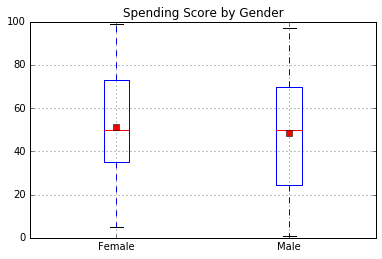

In [6]:
ax = df.boxplot(by='gender', column=['score'], 
                grid=True, showmeans=True)

# Removing automated generic title
plt.suptitle("")
ax.set_xlabel("")
ax.set_title("Spending Score by Gender")

#### We can see between the `.describe()` function and boxplots shown above on the Spending Score by Gender that the median spending for male and females is `50.0%`.  The mean shows that women tend to spend a little more than the men at `51.526%`.  While it is commonly thought that women shop more than men this sample population seems to suggest otherwise.  However it is bias as it only takes into account a population that has a membership at a mall and not everyone who visits the mall.

Text(0, 0.5, 'Number of Shoppers')

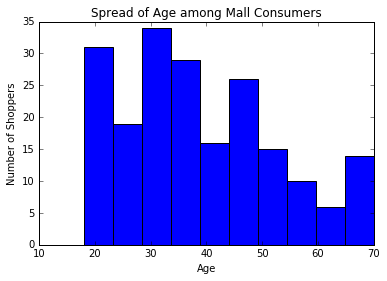

In [7]:
# Taking age and annual income to use for a histogram
a = df.iloc[:, [2]].values

plt.hist(a)
plt.title('Spread of Age among Mall Consumers')
plt.xlabel('Age')
plt.ylabel('Number of Shoppers')

#### Looking at the histogram above, it seems to be positively skewed.  Though not a strong positive skew.  I believe if we had a larger sample it would tend towards a normal distribution.  The largest amount of shoppers tend to be between 20 to 50 years old with frequency in the early 30's age group.  Without more information about frequency of shopping visits and what type of items the shoppers are buying, this information is not very helpful.  Example, if it is during the summer that certain shoppers are shopping as they need portable airconditioning unit.  These could be a one time purchase and they never visit the mall again.  

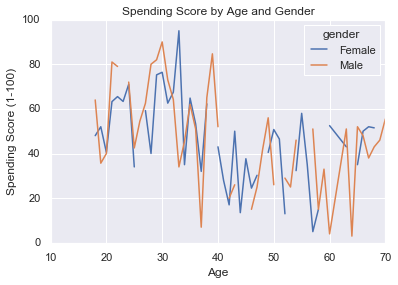

In [28]:
df.pivot_table('score', index='age', columns='gender').plot()
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score by Age and Gender')
plt.show()

####  While this is based on the Spending Score and not number of shoppers, this is very similar to the histogram we just looked over.  However it has gaps in some areas where there were no shoppers of a specific gender and age.  The higher Spending Scores do occur in the age groups from early 20s to late 30s with women having the highest score in their early 30s.  Though the men have the next 2 highest spending scores at around age 30 and late 30s.  I think knowing what type of items purchased at these time would be enlightening to the reasons for these observations.

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


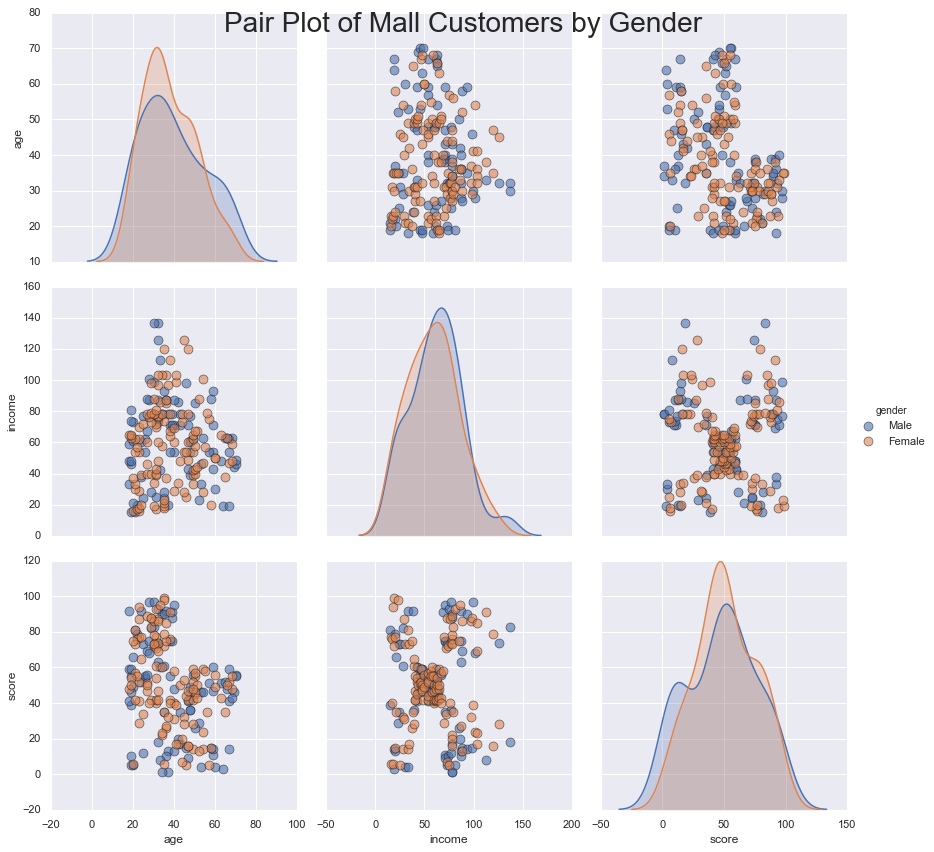

In [19]:
import seaborn as sns

sns.set()
sns.pairplot(df,
             vars = ['age','income','score'],
             hue= 'gender', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's':80, 'edgecolor':'k'},
             size = 4)

plt.suptitle('Pair Plot of Mall Customers by Gender', 
            size=28)
plt.show()